# convert to yolo

In [ ]:
import os
import json
import cv2
import random
import shutil
import numpy as np

# Define dataset paths
json_path = "/home/idrone2/Desktop/tea_pest.json"  # Update this
images_dir = "/home/idrone2/Desktop/new"  # Update this
output_dir = "/home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset"

# Create train/val image and label folders
train_images_dir = os.path.join(output_dir, "images/train")
val_images_dir = os.path.join(output_dir, "images/val")
train_labels_dir = os.path.join(output_dir, "labels/train")
val_labels_dir = os.path.join(output_dir, "labels/val")

os.makedirs(train_images_dir, exist_ok=True)
os.makedirs(val_images_dir, exist_ok=True)
os.makedirs(train_labels_dir, exist_ok=True)
os.makedirs(val_labels_dir, exist_ok=True)

# Load JSON file
with open(json_path, "r") as f:
    data = json.load(f)

# Get image filenames
image_filenames = list(data.keys())
random.shuffle(image_filenames)

# Split dataset (80% train, 20% val)
train_size = int(0.8 * len(image_filenames))
train_images = image_filenames[:train_size]
val_images = image_filenames[train_size:]

# Function to convert polygons to bounding boxes
def polygon_to_bbox(all_points_x, all_points_y, img_width, img_height):
    x_min = min(all_points_x)
    x_max = max(all_points_x)
    y_min = min(all_points_y)
    y_max = max(all_points_y)
    
    x_center = (x_min + x_max) / 2 / img_width
    y_center = (y_min + y_max) / 2 / img_height
    width = (x_max - x_min) / img_width
    height = (y_max - y_min) / img_height

    return x_center, y_center, width, height

# Process each image annotation
for image_name in image_filenames:
    image_path = os.path.join(images_dir, image_name)
    img = cv2.imread(image_path)
    
    if img is None:
        continue

    img_height, img_width, _ = img.shape
    label_file_name = image_name.replace(".jpg", ".txt").replace(".JPG", ".txt")

    if image_name in train_images:
        shutil.copy(image_path, os.path.join(train_images_dir, image_name))
        label_file = os.path.join(train_labels_dir, label_file_name)
    else:
        shutil.copy(image_path, os.path.join(val_images_dir, image_name))
        label_file = os.path.join(val_labels_dir, label_file_name)

    with open(label_file, "w") as label_out:
        for region in data[image_name]["regions"].values():
            shape = region["shape_attributes"]
            if shape["name"] == "polygon":
                all_points_x = shape["all_points_x"]
                all_points_y = shape["all_points_y"]

                # Convert polygon to YOLO bbox
                x_center, y_center, width, height = polygon_to_bbox(all_points_x, all_points_y, img_width, img_height)

                # Get class label (assuming it's stored in "label")
                class_label = region["region_attributes"]["label"]
                class_id = ["rsc", "looper", "thrips", "jassid","rsm","tmb","healthy"].index(class_label)  # Update with actual class names

                label_out.write(f"{class_id} {x_center} {y_center} {width} {height}\n")

print("Conversion to YOLO format completed.")


Conversion to YOLO format completed.


# yolo 11 training 

In [1]:
!pip install ultralytics

Defaulting to user installation because normal site-packages is not writeable


In [2]:
import ultralytics
print(ultralytics.__version__)


Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/home/idrone2/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
8.3.65


In [1]:
from ultralytics import YOLO

# Load a pretrained YOLO model (YOLOv8, closest to YOLOv11)
model = YOLO("yolov8n-seg.pt")  # Use yolov8s.pt, yolov8m.pt, etc. for different sizes

# Train the model
model.train(data="/home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/data.yaml", epochs=50, imgsz=640, batch=16)

# Save the trained model
model.save("yolo_trained.pt")


100%|██████████| 6.74M/6.74M [00:00<00:00, 10.8MB/s]


Ultralytics 8.3.65 🚀 Python-3.10.12 torch-2.5.1+cu124 CUDA:0 (NVIDIA RTX A2000 12GB, 11926MiB)
engine/trainer: task=segment, mode=train, model=yolov8n-seg.pt, data=/home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/data.yaml, epochs=50, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_c

train: Scanning /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/labels/train.cache... 280 images, 0 backgrounds, 0 corrupt: 100%|██████████| 280/280 [00:00<?, ?it/s]

train: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/train/IMG20240805111555.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/train/IMG20240805111843.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/train/IMG20240805112939.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/train/IMG20240805114320.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/train/IMG20240805120237.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/train/IMG20240805120605.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/train/IMG20240805121303.jpg: corrupt JPEG restored and saved
train: WARNING ⚠️ /h


val: Scanning /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/labels/val.cache... 70 images, 0 backgrounds, 0 corrupt: 100%|██████████| 70/70 [00:00<?, ?it/s]

val: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/val/IMG20240805111610.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/val/IMG20240805111854.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/val/IMG20240805120115.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/val/IMG20240805120118.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/val/IMG20240805120248.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/val/IMG20240805120923.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-works/yolo/yolo_dataset/images/val/IMG20240805121228.jpg: corrupt JPEG restored and saved
val: WARNING ⚠️ /home/idrone2/Desktop/Ranjith-wo

Plotting labels to runs/segment/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000909, momentum=0.9) with parameter groups 66 weight(decay=0.0), 77 weight(decay=0.0005), 76 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/segment/train
Starting training for 50 epochs...

      Epoch    GPU_mem   box_loss   seg_loss   cls_loss   dfl_loss  Instances       Size


  0%|          | 0/18 [00:00<?, ?it/s]


TypeError: ERROR ❌ segment dataset incorrectly formatted or not a segment dataset.
This error can occur when incorrectly training a 'segment' model on a 'detect' dataset, i.e. 'yolo train model=yolo11n-seg.pt data=coco8.yaml'.
Verify your dataset is a correctly formatted 'segment' dataset using 'data=coco8-seg.yaml' as an example.
See https://docs.ultralytics.com/datasets/segment/ for help.

# test the model 

In [ ]:
from ultralytics import YOLO

# Load the trained model
model = YOLO("runs/detect/train3/weights/best.pt")

# Inference on a test image
results = model("/home/idrone2/idrone_image_data/Training_set/RSM/GOPR1295.JPG", save=True, show=True)

# Print results
for r in results:
    for box in r.boxes:
        print(f"Class: {r.names[int(box.cls)]}, Confidence: {box.conf}, BBox: {box.xyxy}")



image 1/1 /home/idrone2/idrone_image_data/Training_set/RSM/GOPR1295.JPG: 480x640 1 rsm, 23.6ms
Speed: 1.8ms preprocess, 23.6ms inference, 53.3ms postprocess per image at shape (1, 3, 480, 640)
Results saved to runs/detect/predict23
Class: rsm, Confidence: tensor([0.9483], device='cuda:0'), BBox: tensor([[1526.2405, 1196.4841, 2501.6304, 2964.2971]], device='cuda:0')


: 

In [1]:
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Define custom confidence threshold (e.g., 0.5 for 50%)
CONF_THRESHOLD = 0.7

# Run inference on the test image with a confidence threshold
results = model(
    "/home/idrone2/idrone_image_data/Tea_pest/Tea-TJ/Healthy/IMG_20240805_114916.jpg",
    save=True,
    show=True,
    conf=CONF_THRESHOLD
)

# Print results (filtering based on confidence threshold)
for r in results:
    for box in r.boxes:
        if box.conf >= CONF_THRESHOLD:  # Apply threshold
            print(f"Class: {r.names[int(box.cls)]}, Confidence: {box.conf:.2f}, BBox: {box.xyxy}")



image 1/1 /home/idrone2/idrone_image_data/Tea_pest/Tea-TJ/Healthy/IMG_20240805_114916.jpg: 288x640 1 healthy, 26.1ms
Speed: 1.0ms preprocess, 26.1ms inference, 63.6ms postprocess per image at shape (1, 3, 288, 640)
Results saved to runs/detect/predict11


TypeError: unsupported format string passed to Tensor.__format__

In [ ]:
import glob
from ultralytics import YOLO

# Load the trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Define confidence threshold
CONF_THRESHOLD = 0.5

# Get all images in a folder
image_folder = "/home/idrone2/idrone_image_data/Tea_pest/T&L_dataset"  # Change as needed
image_paths = glob.glob(image_folder + "/*.jpg")  # Adjust for PNG/JPEG

# Run inference on all images in the folder
results = model(image_paths, save=True, show=True, conf=CONF_THRESHOLD)

# Print results for each image
for i, r in enumerate(results):
    print(f"\n🔹 Predictions for: {image_paths[i]}")
    for box in r.boxes:
        if box.conf >= CONF_THRESHOLD:
            print(f"Class: {r.names[int(box.cls)]}, Confidence: {box.conf:.2f}, BBox: {box.xyxy}")



0: 640x640 1 looper, 2.7ms
1: 640x640 (no detections), 2.7ms
2: 640x640 1 looper, 2.7ms
3: 640x640 1 looper, 1 thrips, 2.7ms
4: 640x640 (no detections), 2.7ms
5: 640x640 1 thrips, 1 rsm, 2.7ms
6: 640x640 2 loopers, 2.7ms
7: 640x640 1 looper, 2.7ms
8: 640x640 (no detections), 2.7ms
9: 640x640 1 rsc, 2.7ms
10: 640x640 1 looper, 2.7ms
11: 640x640 (no detections), 2.7ms
12: 640x640 1 thrips, 2.7ms
13: 640x640 1 looper, 2.7ms
14: 640x640 1 looper, 2.7ms
15: 640x640 1 jassid, 2.7ms
16: 640x640 1 looper, 2.7ms
17: 640x640 (no detections), 2.7ms
18: 640x640 (no detections), 2.7ms
19: 640x640 1 thrips, 2.7ms
20: 640x640 (no detections), 2.7ms
21: 640x640 1 looper, 2.7ms
22: 640x640 (no detections), 2.7ms
23: 640x640 (no detections), 2.7ms
24: 640x640 (no detections), 2.7ms
25: 640x640 (no detections), 2.7ms
26: 640x640 1 looper, 2.7ms
27: 640x640 1 looper, 2.7ms
28: 640x640 1 rsc, 2 loopers, 2.7ms
29: 640x640 1 thrips, 2.7ms
30: 640x640 (no detections), 2.7ms
31: 640x640 1 rsc, 2.7ms
32: 640x6

TypeError: unsupported format string passed to Tensor.__format__

: 


0: 640x640 1 looper, 2.7ms
1: 640x640 (no detections), 2.7ms
2: 640x640 1 looper, 2.7ms
3: 640x640 1 looper, 1 thrips, 2.7ms
4: 640x640 (no detections), 2.7ms
5: 640x640 1 thrips, 1 rsm, 2.7ms
6: 640x640 2 loopers, 2.7ms
7: 640x640 1 looper, 2.7ms
8: 640x640 (no detections), 2.7ms
9: 640x640 1 rsc, 2.7ms
10: 640x640 1 looper, 2.7ms
11: 640x640 (no detections), 2.7ms
12: 640x640 1 thrips, 2.7ms
13: 640x640 1 looper, 2.7ms
14: 640x640 1 looper, 2.7ms
15: 640x640 1 jassid, 2.7ms
16: 640x640 1 looper, 2.7ms
17: 640x640 (no detections), 2.7ms
18: 640x640 (no detections), 2.7ms
19: 640x640 1 thrips, 2.7ms
20: 640x640 (no detections), 2.7ms
21: 640x640 1 looper, 2.7ms
22: 640x640 (no detections), 2.7ms
23: 640x640 (no detections), 2.7ms
24: 640x640 (no detections), 2.7ms
25: 640x640 (no detections), 2.7ms
26: 640x640 1 looper, 2.7ms
27: 640x640 1 looper, 2.7ms
28: 640x640 1 rsc, 2 loopers, 2.7ms
29: 640x640 1 thrips, 2.7ms
30: 640x640 (no detections), 2.7ms
31: 640x640 1 rsc, 2.7ms
32: 640x6

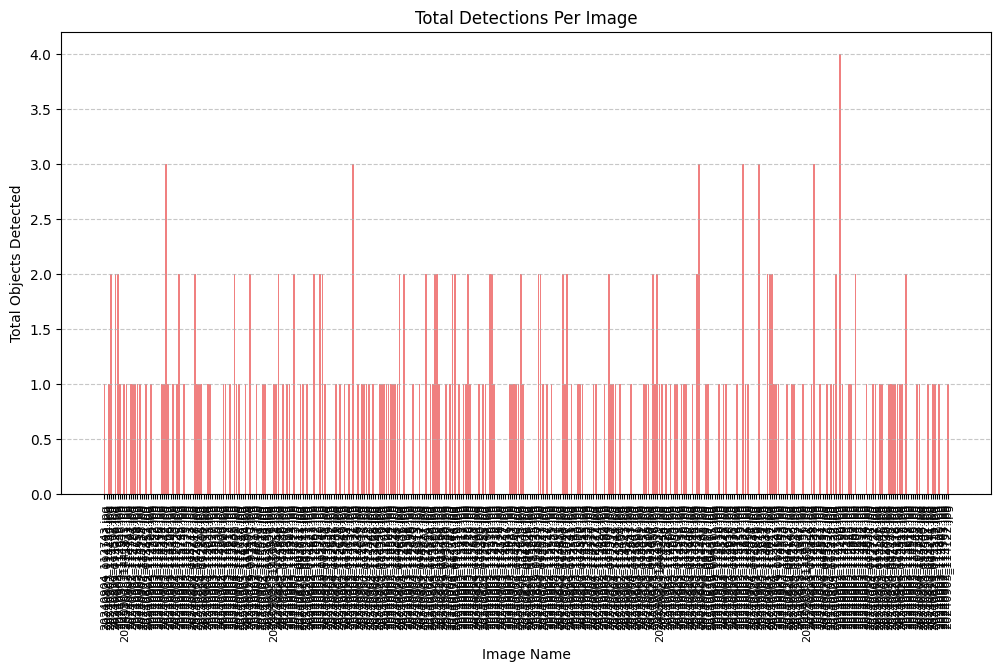

In [3]:
import glob
import matplotlib.pyplot as plt
from collections import defaultdict
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Define confidence threshold
CONF_THRESHOLD = 0.5

# Path to the folder containing test images
image_folder = "/home/idrone2/idrone_image_data/Tea_pest/T&L_dataset"
image_paths = glob.glob(image_folder + "/*.jpg")  # Adjust for PNG/JPEG if needed

# Run inference on all images without displaying them
results = model(image_paths, save=True, show=False, conf=CONF_THRESHOLD)

# Dictionary to store the count of total objects per image
image_detections = {}

# Dictionary to count occurrences of each class globally
class_counts = defaultdict(int)

# Process results and count each detected class per image
for img_path, r in zip(image_paths, results):
    image_name = img_path.split("/")[-1]  # Extract image name from path
    total_objects = 0  # Count total objects per image

    for box in r.boxes:
        conf = box.conf.item()  # Convert confidence tensor to float
        if conf >= CONF_THRESHOLD:
            class_name = r.names[int(box.cls.item())]  # Convert tensor to class name
            class_counts[class_name] += 1  # Update global count
            total_objects += 1  # Update total count for this image

    image_detections[image_name] = total_objects  # Store total count per image

# Print the count of detected objects in each image
print("\n🔹 Total objects detected per image:")
for image, count in image_detections.items():
    print(f"{image}: {count}")

# Print the final count of each class
print("\n🔹 Total detections per class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Plot graph for total objects detected per image
plt.figure(figsize=(12, 6))
plt.bar(image_detections.keys(), image_detections.values(), color="lightcoral")
plt.xlabel("Image Name")
plt.ylabel("Total Objects Detected")
plt.title("Total Detections Per Image")
plt.xticks(rotation=90, fontsize=8)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save and display the plot
plt.savefig("total_objects_per_image.png")
plt.show()



0: 640x640 1 looper, 2.7ms
1: 640x640 (no detections), 2.7ms
2: 640x640 2 loopers, 2.7ms
3: 640x640 1 looper, 1 thrips, 2.7ms
4: 640x640 1 rsc, 2.7ms
5: 640x640 1 thrips, 1 rsm, 2.7ms
6: 640x640 3 loopers, 2.7ms
7: 640x640 1 looper, 2.7ms
8: 640x640 (no detections), 2.7ms
9: 640x640 1 rsc, 2.7ms
10: 640x640 1 looper, 2.7ms
11: 640x640 (no detections), 2.7ms
12: 640x640 1 thrips, 2.7ms
13: 640x640 2 loopers, 2.7ms
14: 640x640 1 rsc, 2 loopers, 2.7ms
15: 640x640 1 jassid, 2.7ms
16: 640x640 3 loopers, 2.7ms
17: 640x640 (no detections), 2.7ms
18: 640x640 (no detections), 2.7ms
19: 640x640 1 thrips, 2.7ms
20: 640x640 (no detections), 2.7ms
21: 640x640 1 looper, 2.7ms
22: 640x640 1 tmb, 2.7ms
23: 640x640 (no detections), 2.7ms
24: 640x640 (no detections), 2.7ms
25: 640x640 (no detections), 2.7ms
26: 640x640 1 looper, 2.7ms
27: 640x640 1 looper, 1 jassid, 2.7ms
28: 640x640 1 rsc, 2 loopers, 2.7ms
29: 640x640 1 thrips, 2.7ms
30: 640x640 (no detections), 2.7ms
31: 640x640 1 rsc, 1 looper, 1 ja

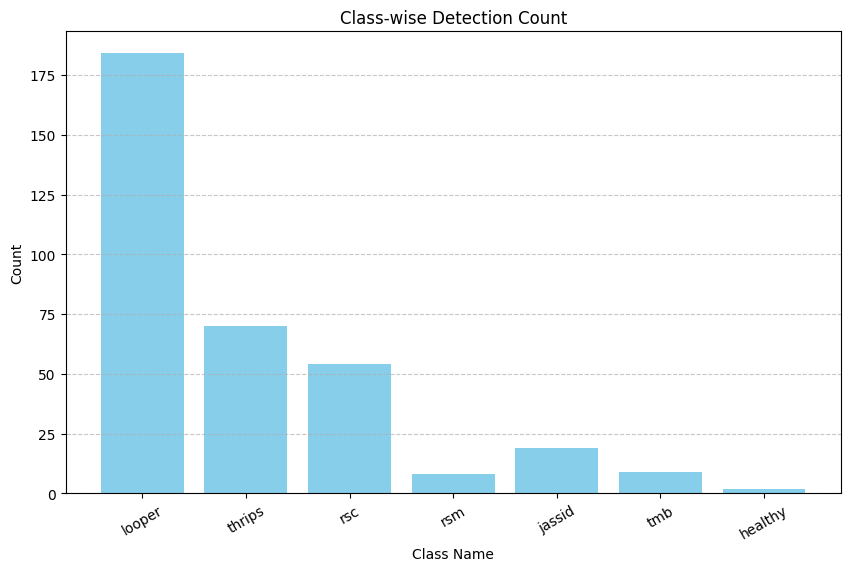

In [2]:
import glob
import matplotlib.pyplot as plt
from collections import defaultdict
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Define confidence threshold
CONF_THRESHOLD = 0.35

# Path to the folder containing test images
image_folder = "/home/idrone2/idrone_image_data/Tea_pest/T&L_dataset"
image_paths = glob.glob(image_folder + "/*.jpg")  # Adjust for PNG/JPEG if needed

# Run inference on all images without displaying them
results = model(image_paths, save=True, show=False, conf=CONF_THRESHOLD)

# Dictionary to count occurrences of each class
class_counts = defaultdict(int)

# Process results and count each detected class
for r in results:
    for box in r.boxes:
        conf = box.conf.item()  # Convert confidence tensor to float
        if conf >= CONF_THRESHOLD:
            class_name = r.names[int(box.cls.item())]  # Convert tensor to int
            class_counts[class_name] += 1  # Update count

# Print the final count of each class
print("\n🔹 Total detections per class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# Save the detection counts in a bar chart
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.title("Class-wise Detection Count")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Save and display the plot
plt.savefig("class_count_plot.png")
plt.show()



0: 640x640 1 looper, 2.7ms
1: 640x640 (no detections), 2.7ms
2: 640x640 1 looper, 2.7ms
3: 640x640 1 looper, 1 thrips, 2.7ms
4: 640x640 (no detections), 2.7ms
5: 640x640 1 thrips, 1 rsm, 2.7ms
6: 640x640 2 loopers, 2.7ms
7: 640x640 1 looper, 2.7ms
8: 640x640 (no detections), 2.7ms
9: 640x640 1 rsc, 2.7ms
10: 640x640 1 looper, 2.7ms
11: 640x640 (no detections), 2.7ms
12: 640x640 1 thrips, 2.7ms
13: 640x640 1 looper, 2.7ms
14: 640x640 1 looper, 2.7ms
15: 640x640 1 jassid, 2.7ms
16: 640x640 1 looper, 2.7ms
17: 640x640 (no detections), 2.7ms
18: 640x640 (no detections), 2.7ms
19: 640x640 1 thrips, 2.7ms
20: 640x640 (no detections), 2.7ms
21: 640x640 1 looper, 2.7ms
22: 640x640 (no detections), 2.7ms
23: 640x640 (no detections), 2.7ms
24: 640x640 (no detections), 2.7ms
25: 640x640 (no detections), 2.7ms
26: 640x640 1 looper, 2.7ms
27: 640x640 1 looper, 2.7ms
28: 640x640 1 rsc, 2 loopers, 2.7ms
29: 640x640 1 thrips, 2.7ms
30: 640x640 (no detections), 2.7ms
31: 640x640 1 rsc, 2.7ms
32: 640x6

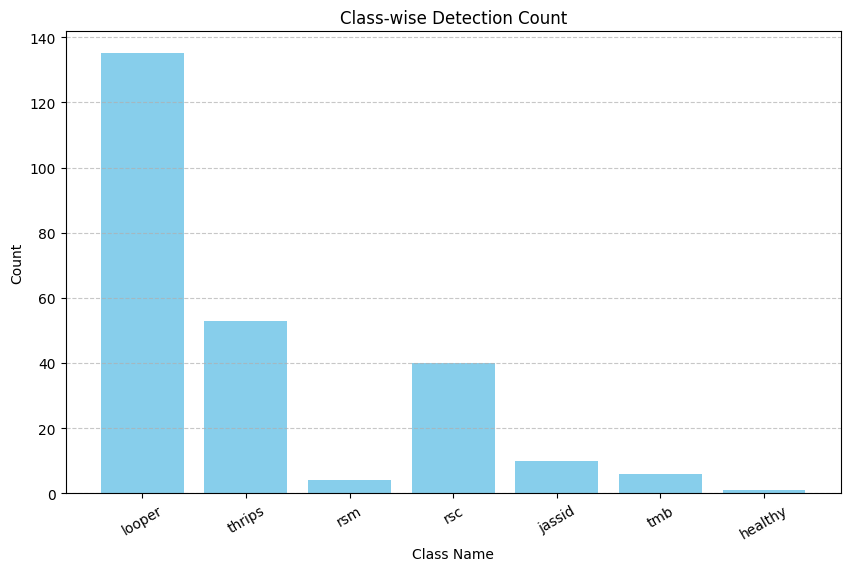

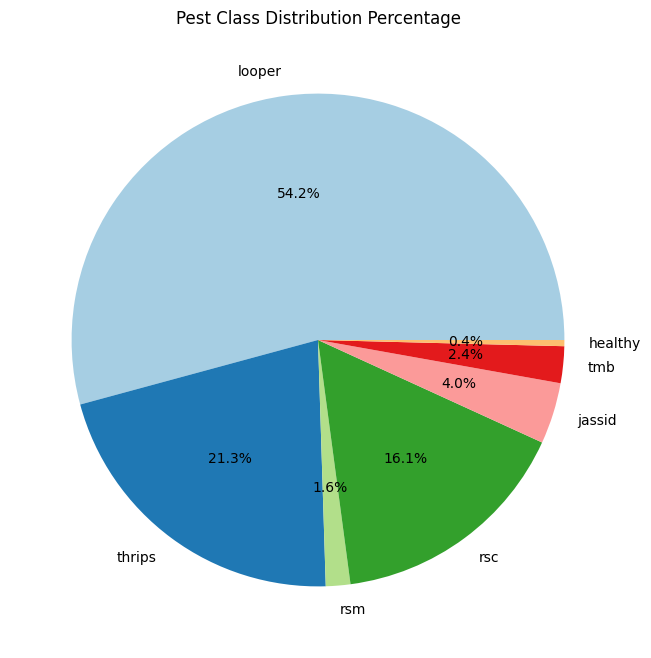

In [4]:
import glob
import matplotlib.pyplot as plt
from collections import defaultdict
from ultralytics import YOLO
import numpy as np

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Define confidence threshold
CONF_THRESHOLD = 0.5

# Path to the folder containing test images
image_folder = "/home/idrone2/idrone_image_data/Tea_pest/T&L_dataset"
image_paths = glob.glob(image_folder + "/*.jpg")  # Adjust for PNG/JPEG if needed

# Run inference on all images without displaying them
results = model(image_paths, save=True, show=False, conf=CONF_THRESHOLD)

# Dictionaries to count occurrences
class_counts = defaultdict(int)  # Total detections per class
image_pred_counts = defaultdict(int)  # Total detections per image

# Process results
for img_path, r in zip(image_paths, results):
    image_name = img_path.split("/")[-1]  # Extract filename
    total_preds = 0  # Total predictions for this image

    for box in r.boxes:
        conf = box.conf.item()  # Convert tensor to float
        if conf >= CONF_THRESHOLD:
            class_name = r.names[int(box.cls.item())]  # Convert tensor to class label
            class_counts[class_name] += 1  # Update class count
            total_preds += 1  # Count total detections in the image

    # Store the total count per image
    image_pred_counts[image_name] = total_preds

# Print total detections per image
print("\n🔹 Total detections per image:")
for image_name, count in image_pred_counts.items():
    print(f"{image_name}: {count}")

# Print total detections per class
print("\n🔹 Total detections per class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# --- PLOTTING ---

# Bar Chart: Total detections per class
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.title("Class-wise Detection Count")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("class_count_bar_chart.png")
plt.show()

# Pie Chart: Pest Percentage Distribution
total_detections = sum(class_counts.values())  # Total pest detections
labels = class_counts.keys()
sizes = [count / total_detections * 100 for count in class_counts.values()]  # Convert to percentage

plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
plt.title("Pest Class Distribution Percentage")
plt.savefig("pest_percentage_pie_chart.png")
plt.show()



0: 480x640 (no detections), 2.3ms
1: 480x640 (no detections), 2.3ms
2: 480x640 (no detections), 2.3ms
3: 480x640 (no detections), 2.3ms
4: 480x640 (no detections), 2.3ms
5: 480x640 (no detections), 2.3ms
6: 480x640 (no detections), 2.3ms
7: 480x640 (no detections), 2.3ms
8: 480x640 (no detections), 2.3ms
9: 480x640 (no detections), 2.3ms
10: 480x640 (no detections), 2.3ms
11: 480x640 (no detections), 2.3ms
12: 480x640 (no detections), 2.3ms
13: 480x640 (no detections), 2.3ms
14: 480x640 (no detections), 2.3ms
15: 480x640 (no detections), 2.3ms
16: 480x640 (no detections), 2.3ms
17: 480x640 (no detections), 2.3ms
18: 480x640 (no detections), 2.3ms
19: 480x640 (no detections), 2.3ms
20: 480x640 (no detections), 2.3ms
21: 480x640 (no detections), 2.3ms
22: 480x640 (no detections), 2.3ms
23: 480x640 (no detections), 2.3ms
24: 480x640 1 looper, 2.3ms
25: 480x640 (no detections), 2.3ms
26: 480x640 (no detections), 2.3ms
27: 480x640 (no detections), 2.3ms
28: 480x640 (no detections), 2.3ms
2

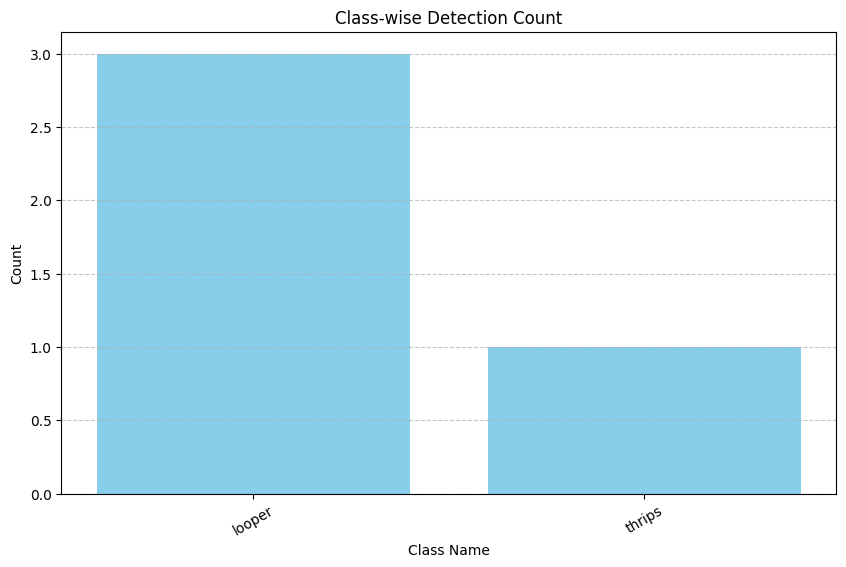

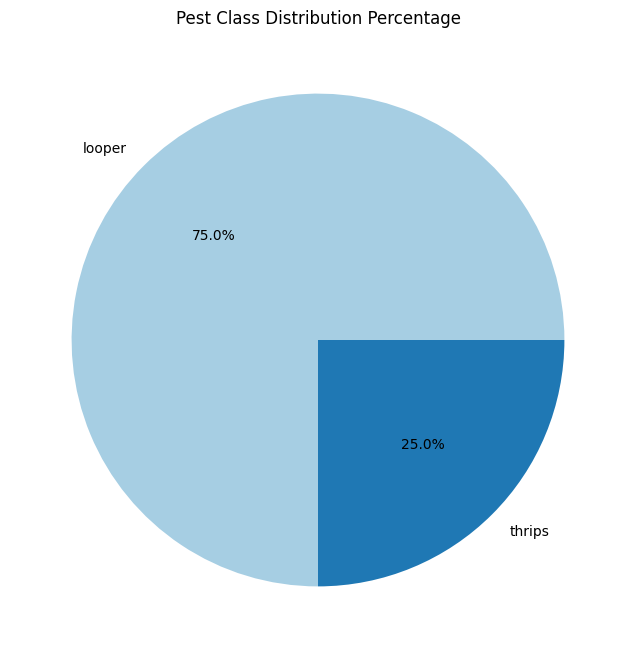

In [1]:
import glob
import matplotlib.pyplot as plt
from collections import defaultdict
from ultralytics import YOLO

# Load trained YOLO model
model = YOLO("runs/detect/train3/weights/best.pt")

# Define confidence threshold
CONF_THRESHOLD = 0.5

# Path to the folder containing test images
image_folder = "/home/idrone2/drone_image_for_testing"
image_paths = glob.glob(image_folder + "/*.JPG")  # Adjust for PNG/JPEG if needed

# If no images are found, stop execution
if not image_paths:
    print("⚠️ No images found in the given path. Please check the directory and file extensions.")
    exit()

# Run inference on all images without displaying them
results = model(image_paths, save=True, show=False, conf=CONF_THRESHOLD)

# Dictionaries to count occurrences
class_counts = defaultdict(int)  # Total detections per class
image_pred_counts = defaultdict(int)  # Total detections per image

# Process results
for img_path, r in zip(image_paths, results):
    image_name = img_path.split("/")[-1]  # Extract filename
    total_preds = 0  # Total predictions for this image

    for box in r.boxes:
        conf = box.conf.item()  # Convert tensor to float
        if conf >= CONF_THRESHOLD:
            class_name = r.names[int(box.cls.item())]  # Convert tensor to class label
            class_counts[class_name] += 1  # Update class count
            total_preds += 1  # Count total detections in the image

    # Store the total count per image
    image_pred_counts[image_name] = total_preds

# Print total detections per image
print("\n🔹 Total detections per image:")
for image_name, count in image_pred_counts.items():
    print(f"{image_name}: {count}")

# Print total detections per class
print("\n🔹 Total detections per class:")
for class_name, count in class_counts.items():
    print(f"{class_name}: {count}")

# --- PLOTTING ---

# Bar Chart: Total detections per class
plt.figure(figsize=(10, 6))
plt.bar(class_counts.keys(), class_counts.values(), color="skyblue")
plt.xlabel("Class Name")
plt.ylabel("Count")
plt.title("Class-wise Detection Count")
plt.xticks(rotation=30)
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.savefig("class_count_bar_chart.png")
plt.show()

# Pie Chart: Pest Percentage Distribution
total_detections = sum(class_counts.values())  # Total pest detections
if total_detections > 0:
    labels = class_counts.keys()
    sizes = [count / total_detections * 100 for count in class_counts.values()]  # Convert to percentage

    plt.figure(figsize=(8, 8))
    plt.pie(sizes, labels=labels, autopct="%1.1f%%", colors=plt.cm.Paired.colors)
    plt.title("Pest Class Distribution Percentage")
    plt.savefig("pest_percentage_pie_chart.png")
    plt.show()
else:
    print("⚠️ No detections found, skipping pie chart generation.")
